In [3]:
import pandas as pd
from google.colab import files 
fileku=files.upload()

Saving train.csv to train.csv


In [4]:
fileku

{'train.csv': b'state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn\nOH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,no\nNJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,no\nOH,84,area_code_408,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no\nOK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no\nMA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no\nMO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no\nLA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no\nWV

In [5]:
import io
df_train = pd.read_csv(io.BytesIO(fileku['train.csv']))

In [6]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [7]:
df_train.shape

(4250, 20)

In [8]:
df_train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [9]:
df_train.duplicated().sum()

0

In [10]:
#Melihat missing values
df_train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [11]:
#Melihat tipe data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

# Exploratory Data Analysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#mengubah data kategorik menjadi numerik

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_train['international_plan'] = labelencoder.fit_transform(df_train['international_plan'])
df_train['voice_mail_plan'] = labelencoder.fit_transform(df_train['voice_mail_plan'])
df_train['churn'] = labelencoder.fit_transform(df_train['churn'])

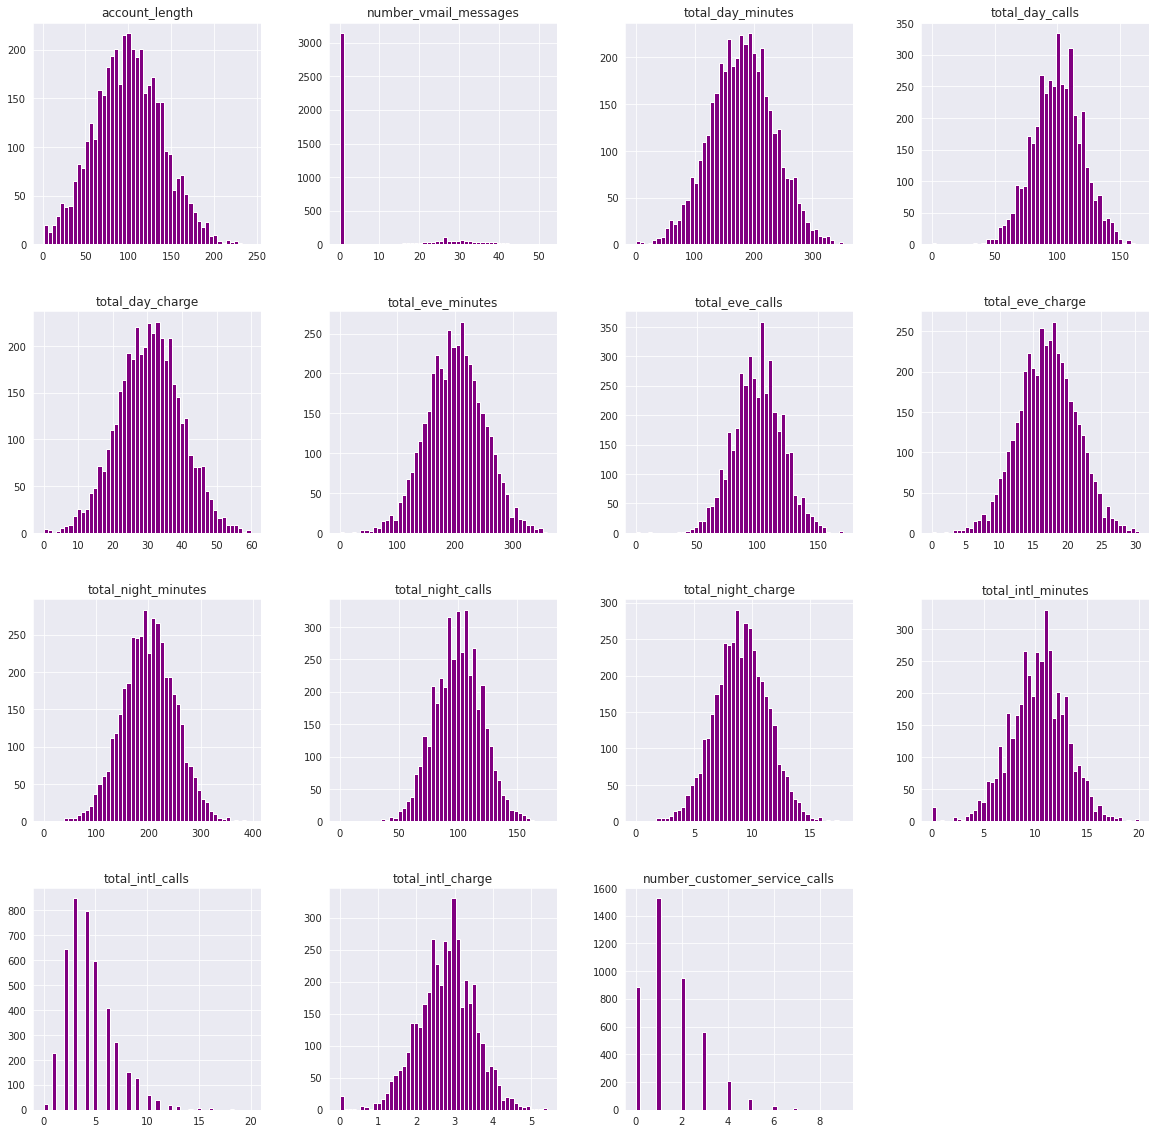

In [14]:
sns.set_style('dark')
temp = df_train[['account_length',
       'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']]
temp.hist(bins=50,figsize=(20,20),color='purple');



In [14]:
x=df_train["churn"].value_counts()
y= df_train["voice_mail_plan"].value_counts()
z= df_train["international_plan"].value_counts()
print(x)
print('--------------------------------------')
print(y)
print('--------------------------------------')
print(z)


0    3652
1     598
Name: churn, dtype: int64
--------------------------------------
0    3138
1    1112
Name: voice_mail_plan, dtype: int64
--------------------------------------
0    3854
1     396
Name: international_plan, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


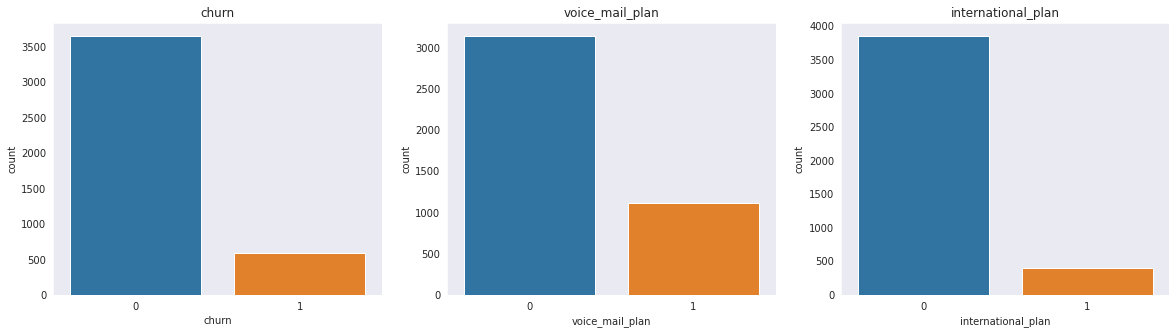

In [15]:
f,ax=plt.subplots(1,3,figsize=(20,5))
sns.countplot('churn',data=df_train,ax=ax[0])
ax[0].set_title('churn')
sns.countplot('voice_mail_plan',data=df_train,ax=ax[1])
ax[1].set_title('voice_mail_plan')
sns.countplot('international_plan',data=df_train,ax=ax[2])
ax[2].set_title('international_plan')
plt.show()

Text(0, 0.5, '')

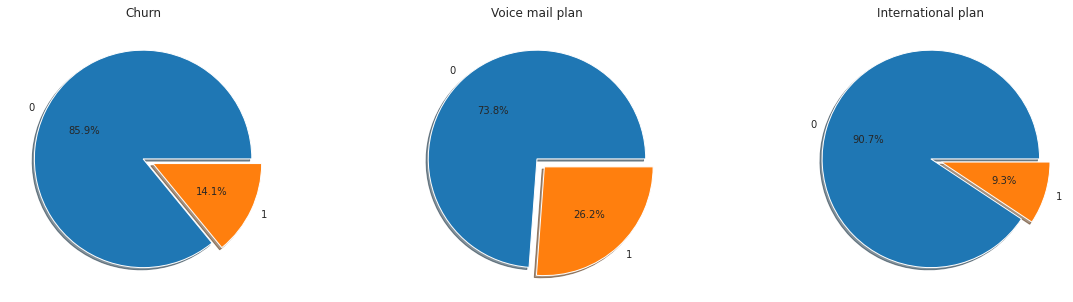

In [16]:
f,ax=plt.subplots(1,3,figsize=(20,5))
df_train['churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Churn')
ax[0].set_ylabel('')
df_train['voice_mail_plan'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[1].set_title('Voice mail plan')
ax[1].set_ylabel('')
df_train['international_plan'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[2].set_title('International plan')
ax[2].set_ylabel('')


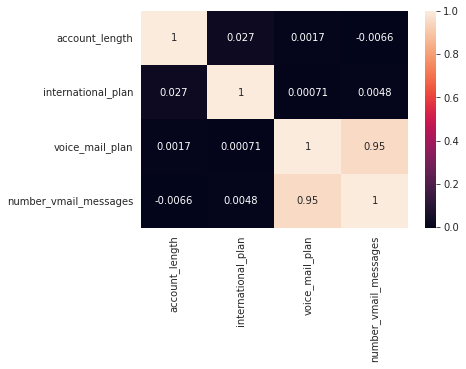

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small = df_train.iloc[:,:6]
correlation_mat = df_small.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [18]:
#Melihat korelasi antar variabel
df_train.corr()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
account_length,1.000000,0.027050,0.001663,-0.006626,-0.001612,0.023002,-0.001613,-0.010326,0.005535,-0.010322,-0.009916,-0.001846,-0.009942,0.004539,0.013690,0.004494,0.001002,0.019378
international_plan,0.027050,1.000000,0.000714,0.004808,0.040059,0.009776,0.040061,0.023484,-0.003004,0.023479,-0.020694,0.007153,-0.020694,0.023815,0.006956,0.023799,-0.008881,0.259053
voice_mail_plan,0.001663,0.000714,1.000000,0.954014,-0.000653,-0.010004,-0.000658,0.011982,0.000263,0.011989,0.017884,0.007872,0.017875,0.008098,-0.005674,0.008129,-0.021504,-0.114643
number_vmail_messages,-0.006626,0.004808,0.954014,1.000000,0.002000,-0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,-0.015303,-0.100347
total_day_minutes,-0.001612,0.040059,-0.000653,0.002000,1.000000,0.000747,1.000000,-0.013248,0.005986,-0.013258,0.010049,-0.004812,0.010036,-0.021369,0.003859,-0.021291,-0.002925,0.215272
total_day_calls,0.023002,0.009776,-0.010004,-0.006920,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,-0.004815,0.002200,0.008834,0.009377,0.008909,-0.015845,0.011640
total_day_charge,-0.001613,0.040061,-0.000658,0.001994,1.000000,0.000751,1.000000,-0.013247,0.005985,-0.013257,0.010053,-0.004816,0.010040,-0.021374,0.003853,-0.021296,-0.002932,0.215263
total_eve_minutes,-0.010326,0.023484,0.011982,0.010725,-0.013248,0.008661,-0.013247,1.000000,0.003101,1.000000,-0.014018,0.011973,-0.014031,-0.003509,0.012239,-0.003460,-0.010063,0.078855
total_eve_calls,0.005535,-0.003004,0.000263,0.003593,0.005986,0.003739,0.005985,0.003101,1.000000,0.003120,0.008425,-0.011929,0.008441,-0.013096,0.004949,-0.013145,0.006956,-0.006817
total_eve_charge,-0.010322,0.023479,0.011989,0.010736,-0.013258,0.008663,-0.013257,1.000000,0.003120,1.000000,-0.014022,0.011971,-0.014035,-0.003512,0.012239,-0.003463,-0.010071,0.078852


 Top 10 State by Churn

In [19]:
df_sc = df_train.groupby(['state']).agg({'churn':'count'}).sort_values('churn', ascending=False)
df_sc[:10].reset_index()

,state,churn
0,WV,139
1,MN,108
2,ID,106
3,AL,101
4,VA,100
5,OR,99
6,TX,98
7,UT,97
8,NJ,96
9,NY,96


# Data Preprocessing

In [20]:
# Import Library
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [21]:
df_train.describe()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,0.093176,0.261647,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,0.140706
std,39.698401,0.290714,0.439583,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,0.347759
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,0.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.000000,0.000000,0.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,243.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [22]:
df_train['account_length'] = MinMaxScaler().fit_transform(df_train['account_length'].values.reshape(len(df_train), 1))
df_train['international_plan'] = MinMaxScaler().fit_transform(df_train['international_plan'].values.reshape(len(df_train), 1))
df_train['voice_mail_plan'] = MinMaxScaler().fit_transform(df_train['voice_mail_plan'].values.reshape(len(df_train), 1))
df_train['number_vmail_messages'] = MinMaxScaler().fit_transform(df_train['number_vmail_messages'].values.reshape(len(df_train), 1))
df_train['total_day_minutes'] = MinMaxScaler().fit_transform(df_train['total_day_minutes'].values.reshape(len(df_train), 1))
df_train['total_day_calls'] = MinMaxScaler().fit_transform(df_train['total_day_calls'].values.reshape(len(df_train), 1))
df_train['total_day_charge'] = MinMaxScaler().fit_transform(df_train['total_day_charge'].values.reshape(len(df_train), 1))
df_train['total_eve_minutes'] = MinMaxScaler().fit_transform(df_train['total_eve_minutes'].values.reshape(len(df_train), 1))
df_train['total_eve_calls'] = MinMaxScaler().fit_transform(df_train['total_eve_calls'].values.reshape(len(df_train), 1))
df_train['total_eve_charge'] = MinMaxScaler().fit_transform(df_train['total_eve_charge'].values.reshape(len(df_train), 1))
df_train['total_night_minutes'] = MinMaxScaler().fit_transform(df_train['total_night_minutes'].values.reshape(len(df_train), 1))
df_train['total_night_calls'] = MinMaxScaler().fit_transform(df_train['total_night_calls'].values.reshape(len(df_train), 1))
df_train['total_night_charge'] = MinMaxScaler().fit_transform(df_train['total_night_charge'].values.reshape(len(df_train), 1))
df_train['total_intl_minutes'] = MinMaxScaler().fit_transform(df_train['total_intl_minutes'].values.reshape(len(df_train), 1))
df_train['total_intl_calls'] = MinMaxScaler().fit_transform(df_train['total_intl_calls'].values.reshape(len(df_train), 1))
df_train['total_intl_charge'] = MinMaxScaler().fit_transform(df_train['total_intl_charge'].values.reshape(len(df_train), 1))
df_train['number_customer_service_calls'] = MinMaxScaler().fit_transform(df_train['number_customer_service_calls'].values.reshape(len(df_train), 1))

In [23]:
numerical = ['account_length',
       'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'] 

# Using IQR
print(f'Jumlah baris sebelum memfilter outlier: {len(df_train)}')

filtered_entries = np.array([True] * len(df_train))

for col in numerical:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_train[col] >= low_limit) & (df_train[col] <= high_limit)) & filtered_entries
    
df_train = df_train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_train)}')

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 3513


Independent and Dependent Variable

In [39]:
df_model = df_train[['account_length', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn']]
df_model.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.544114,0.605882,0.544204,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111,0
1,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.337323,0.647059,0.337263,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000,0
3,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.412747,0.717647,0.412901,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333,0
5,0.603306,1.0,0.0,0.000000,0.446657,0.478788,0.446620,0.286947,0.552941,0.286837,0.536203,0.548571,0.536297,0.355,0.30,0.355556,0.000000,0
7,0.578512,1.0,1.0,0.711538,0.735704,0.509091,0.735609,0.617868,0.652941,0.617878,0.826329,0.554286,0.826674,0.560,0.25,0.559259,0.000000,0


In [40]:
X = df_model.drop(['churn','number_customer_service_calls'], axis=1)

In [41]:
y = df_model['churn']

# Train Test Split

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# KNN model

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.9294653014789533
Confusion Matrix : 
[[787  17]
 [ 45  30]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       804
           1       0.64      0.40      0.49        75

    accuracy                           0.93       879
   macro avg       0.79      0.69      0.73       879
weighted avg       0.92      0.93      0.92       879



# Decision Tree Model

In [96]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.9215017064846417
Confusion Matrix : 
[[755  49]
 [ 20  55]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       804
           1       0.53      0.73      0.61        75

    accuracy                           0.92       879
   macro avg       0.75      0.84      0.79       879
weighted avg       0.94      0.92      0.93       879



# Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9704209328782708
Confusion Matrix : 
[[801   3]
 [ 23  52]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       804
           1       0.95      0.69      0.80        75

    accuracy                           0.97       879
   macro avg       0.96      0.84      0.89       879
weighted avg       0.97      0.97      0.97       879



# Logistic Regression Model

In [99]:
from sklearn.ensemble import RandomForestClassifier
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.9271899886234357
Confusion Matrix : 
[[789  15]
 [ 49  26]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       804
           1       0.63      0.35      0.45        75

    accuracy                           0.93       879
   macro avg       0.79      0.66      0.70       879
weighted avg       0.92      0.93      0.92       879



In [101]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

acc_svc = accuracy_score(y_test, y_pred_svc)
conf = confusion_matrix(y_test, y_pred_svc)
clf_report = classification_report(y_test, y_pred_svc)

print(f"Accuracy Score of Super Vector Machine is : {acc_svc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Super Vector Machine is : 0.9556313993174061
Confusion Matrix : 
[[799   5]
 [ 34  41]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       804
           1       0.89      0.55      0.68        75

    accuracy                           0.96       879
   macro avg       0.93      0.77      0.83       879
weighted avg       0.95      0.96      0.95       879



In [102]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_lr, 
              acc_rd_clf, acc_dtc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.970421
0,Support Vector Machines,0.955631
1,KNN,0.929465
2,Logistic Regression,0.927190
4,Decision Tree,0.921502
